# Are MSTs the same as SparseNets?

In [143]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random as R
from graph.sparsenet import sparsenet

First, let's generate a graph.

In [145]:
G = nx.gnm_random_graph(200, 1000)

Now, let's get the minimum spanning tree.

In [112]:
mst = nx.minimum_spanning_tree(G)

How many nodes and edges are in it?

In [117]:
mst.number_of_nodes(), mst.number_of_edges()

(65, 63)

In [116]:
for node in (node for node, adj in list(mst.adjacency()) if len(adj) == 1):
    mst.remove_node(node)

Now, let's calculate the SparseNet.

In [159]:
distance_matrix = nx.floyd_warshall_numpy(G)
vertex_to_index = { node:i for i, node in enumerate(G.nodes) }
sn = nx.Graph()
colors = {}
for path in sparsenet(G, distance_matrix, vertex_to_index):
    color = (R.random(), R.random(), R.random())
    for node in path:
        if node not in colors:
            colors[node] = color
    for edge in zip(path, path[1:]):
        sn.add_edge(*edge)
sn.number_of_nodes(), sn.number_of_edges()

(61, 60)

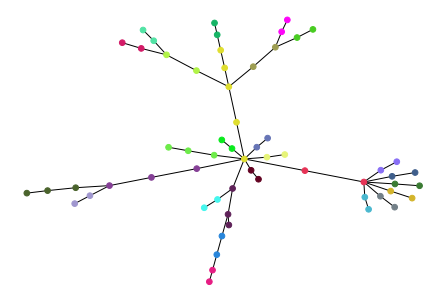

In [165]:
nx.draw(sn, pos=nx.spring_layout(sn, iterations=1000), node_size=32, node_color=[colors[node] for node in sn.nodes()])

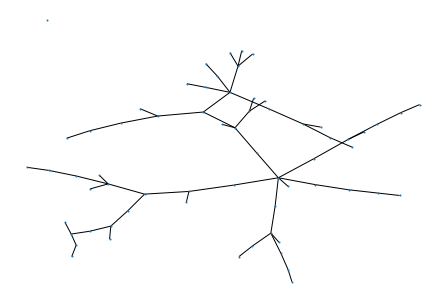

In [118]:
nx.draw(mst, node_size=1)

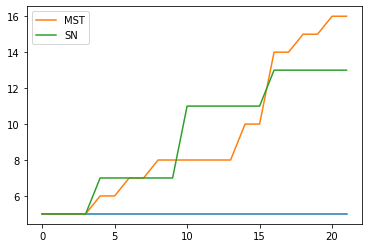

In [75]:
diameter = distance_matrix.max()
lengths = []
for i, distances in enumerate(np.array(distance_matrix)):
    for j, distance in enumerate(distances):
        if distance == diameter:
            try:
                lengths.append((len(nx.shortest_path(G, i, j)), 
                                len(nx.shortest_path(mst, i, j)),
                                len(nx.shortest_path(sn, i, j))))
            except:
                pass
lengths_G, lengths_MST, lengths_SN = list(zip(*lengths))
plt.plot(sorted(lengths_G))
plt.plot(sorted(lengths_MST), label='MST')
plt.plot(sorted(lengths_SN), label='SN')
plt.legend();

Let's repeatedly run the MST and SparseNet algorithms on the same graph and see the outputs.

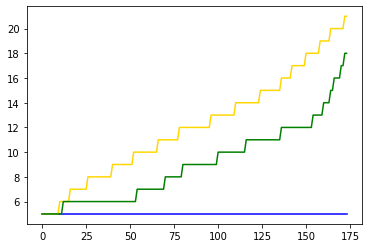

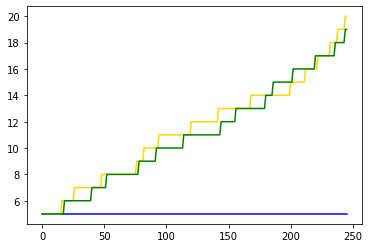

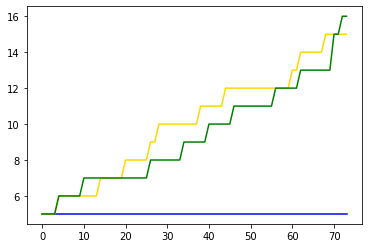

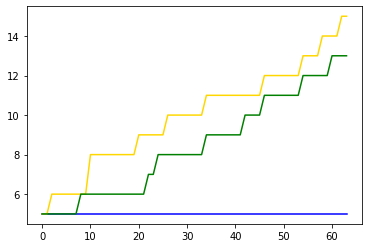

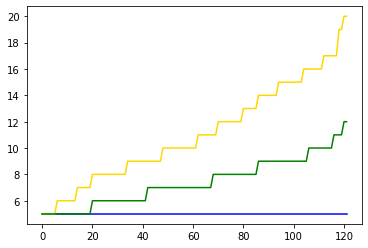

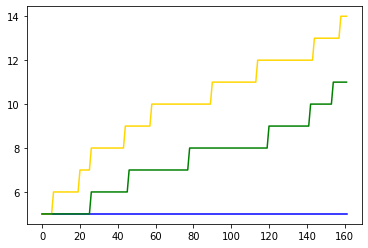

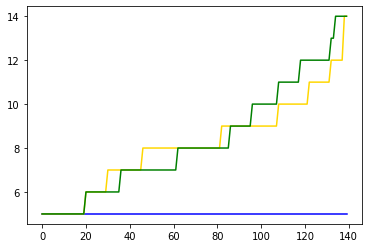

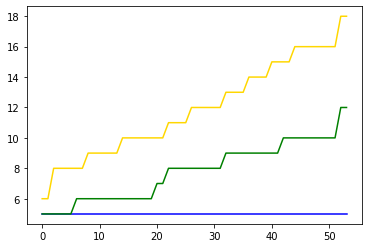

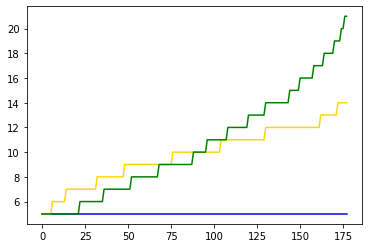

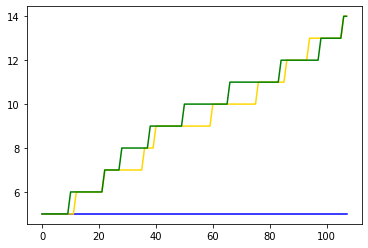

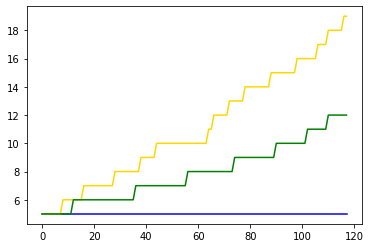

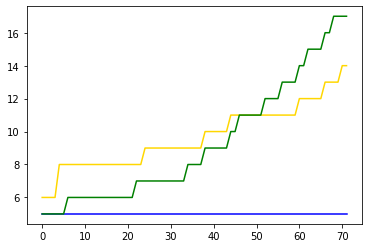

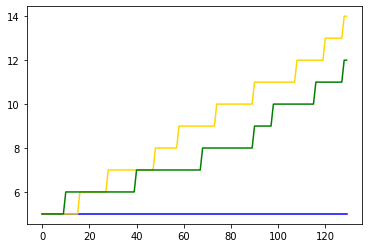

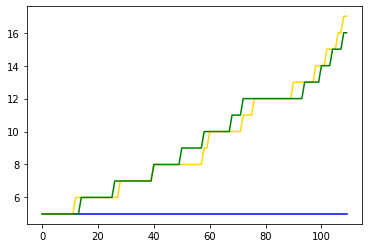

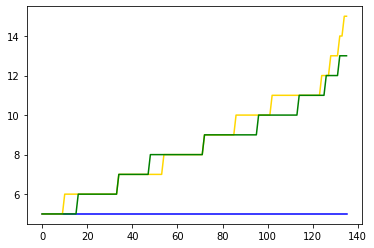

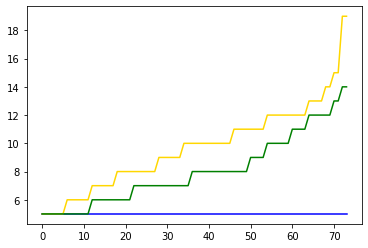

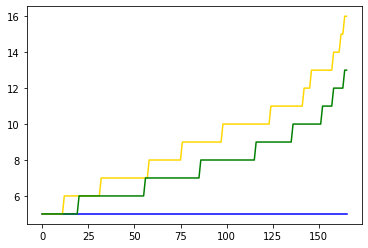

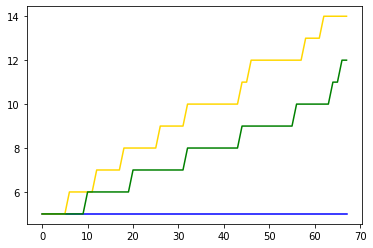

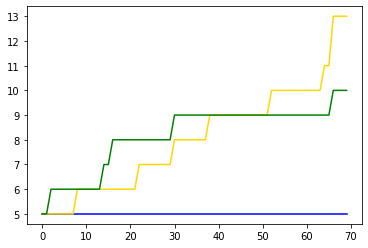

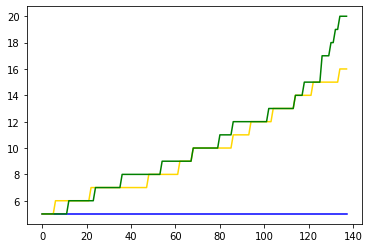

In [86]:
for _ in range(20):
    G = nx.gnm_random_graph(200, 1000)
    distance_matrix = nx.floyd_warshall_numpy(G)
    vertex_to_index = { node:i for i, node in enumerate(G.nodes) }
    mst = nx.minimum_spanning_tree(G)
    sn = nx.Graph()
    for path in sparsenet(G, distance_matrix, vertex_to_index):
        for edge in zip(path, path[1:]):
            sn.add_edge(*edge)

    lengths = []
    for i, distances in enumerate(np.array(distance_matrix)):
        for j, distance in enumerate(distances):
            if distance == diameter:
                try:
                    lengths.append((len(nx.shortest_path(G, i, j)), 
                                    len(nx.shortest_path(mst, i, j)),
                                    len(nx.shortest_path(sn, i, j))))
                except:
                    pass
    lengths_G, lengths_MST, lengths_SN = list(zip(*lengths))
    plt.plot(sorted(lengths_G), color='blue')
    plt.plot(sorted(lengths_MST), label='MST', color='gold')
    plt.plot(sorted(lengths_SN), label='SN', color='green')
    plt.show()